In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IaXBEeWUF7jj47qZcsVn")
project = rf.workspace("firstproject-qh0bd").project("plant-identification-41vnn")
version = project.version(1)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-Identification-1 in folder:: 100%|██████████| 19216/19216 [00:05<00:00, 3282.48it/s]


In [2]:
# Install the required YOLOv8 library
!pip install ultralytics==8.0.20

# Clear any existing outputs and check the setup
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [3]:
# Change to the dataset directory
import os
HOME = os.getcwd()
print("Current Working Directory:", HOME)

Current Working Directory: /content


In [4]:
# Set the dataset directory path
%cd /content/Plant-Identification-1

/content/Plant-Identification-1


In [6]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8s-cls.pt')  # 'n' can be replaced with 's', 'm', 'l', etc., for different model sizes.

# Train the model
model.train(data="/content/Plant-Identification-1",
            epochs=30,
            imgsz=224)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yol

In [7]:
# Validate the trained model on the validation set
model.val()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5103382 parameters, 0 gradients, 12.5 GFLOPs
albumentations: RandomResizedCrop(p=1.0, size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1, mask_interpolation=0), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(0.0, 0.0)), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, normalization='standard'), ToTensorV2(p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:05<00:00, 11.73it/s]
                   all      0.877      0.982
Speed: 0.1ms pre-process, 1.1ms inference, 0.0ms loss, 0.0ms post-process per image


In [8]:
# Display class names
class_names = model.names
print("Class Names:", class_names)

Class Names: {0: 'Adulsa', 1: 'Alovera', 2: 'Amla', 3: 'Banana', 4: 'BeetalLeaf(Pan)', 5: 'Bramhi', 6: 'CurryLeaves', 7: 'Drumstick', 8: 'Eranda', 9: 'Gokarna', 10: 'Hibiscus', 11: 'Jamun(IndianBlackberry)', 12: 'Mango', 13: 'Neem', 14: 'Onion', 15: 'Panfuti', 16: 'Papaya', 17: 'Satynashi', 18: 'Shatavari', 19: 'Sugarcane', 20: 'Tandulja', 21: 'TouchMeNot'}


In [9]:
# Sample Predictions with YOLOv8
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

In [10]:
# Load and preprocess an image for prediction
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).resize(target_size)
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [22]:
def predict_image_class_with_probabilities_yolo(model, image_path):
    predictions = model.predict(source=image_path)  # Make prediction
    prediction = predictions[0]

    # Convert prediction.probs to a NumPy array before rounding
    probs_np = prediction.probs.cpu().numpy()

    # Ensure class names are aligned with the model's output indices
    class_names = model.names if hasattr(model, 'names') else ['Adulsa', 'Alovera', 'Amla', 'Banana', 'BeetalLeaf(Pan)',
                                                                'Bramhi', 'CurryLeaves', 'Drumstick', 'Eranda', 'Gokarna',
                                                                'Hibiscus', 'Jamun(IndianBlackberry)', 'Mango', 'Neem',
                                                                'Onion', 'Panfuti', 'Papaya', 'Satynashi', 'Shatavari',
                                                                'Sugarcane', 'Tandulja', 'TouchMeNot']

    # Create probabilities dictionary
    class_probabilities = {class_name: round(prob * 100, 2) for class_name, prob in zip(class_names, probs_np)}

    # Get the predicted class and probability
    predicted_class_index = np.argmax(probs_np)
    predicted_class_name = class_names[predicted_class_index]
    predicted_class_prob = class_probabilities.get(predicted_class_name, 0.0)  # Avoid KeyError

    return predicted_class_name, predicted_class_prob, class_probabilities


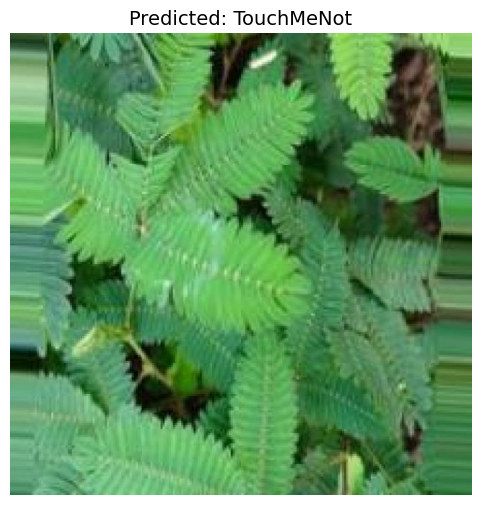

In [77]:
# Path to a test image
image_path = '/content/Plant-Identification-1/test/TouchMeNot/aug_0_179_jpg.rf.cb4ad9775399e4916769687f2990fe09.jpg'  # Update with actual path

predicted_class_name, predicted_class_prob, class_probabilities = predict_image_class_with_probabilities_yolo(
    model, image_path
)

# Display results
img = mpimg.imread(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name}", fontsize=14)
plt.show()



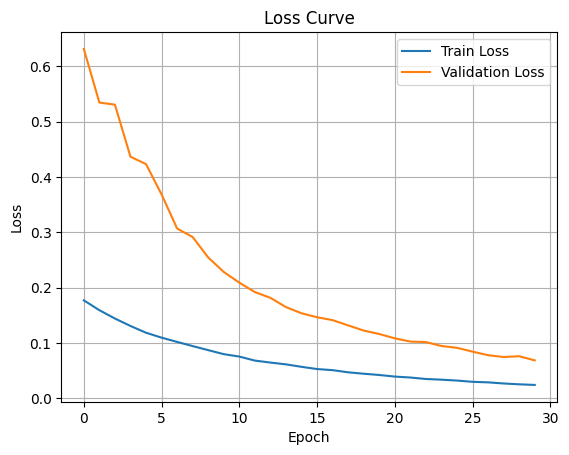

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results CSV file
results_csv_path = '/content/Plant-Identification-1/runs/classify/train2/results.csv'  # Update the path as needed

# Load the CSV file
results_df = pd.read_csv(results_csv_path)

# Plot training and validation loss
plt.plot(results_df['epoch'], results_df['train_loss'], label='Train Loss')
plt.plot(results_df['epoch'], results_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()


In [78]:
from ultralytics import YOLO

# Load YOLOv8 classification model
model = YOLO('/content/Plant-Identification-1/yolov8s-cls.pt')

# Export to ONNX format
model.export(format='onnx')  # Exports the model to yolov8s-cls.onnx


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 6356200 parameter